# SP500 data 
###### Author: Mokhtar Z. Alaya <alayaelm@utc.fr> 

In [3]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

import sys
sys.path.append('/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/src')

from src.utils import *
from src.kernels import Kernel

init_notebook_mode(connected=True) ## plotly init

import os
path_data = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/data/"

In [4]:
df_sp500 = pd.read_csv(path_data + 'sp500_data.csv')# 'sp500.csv')

In [5]:
df_sp500.shape, 

((8372, 5),)

In [6]:
df_sp500.head()

,Date,SP500,T10yAaa.lag,AaaBaa.lag,T10yT1y.lag
0,1986-01-03,0.006136,0.88,1.46,1.40
1,1986-01-06,-0.001091,0.87,1.43,1.40
2,1986-01-07,0.014843,0.87,1.42,1.43
3,1986-01-08,-0.027647,0.91,1.44,1.35
4,1986-01-09,-0.008984,0.76,1.45,1.40


2024/06/04 11:13:47 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024/06/04 11:13:47 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


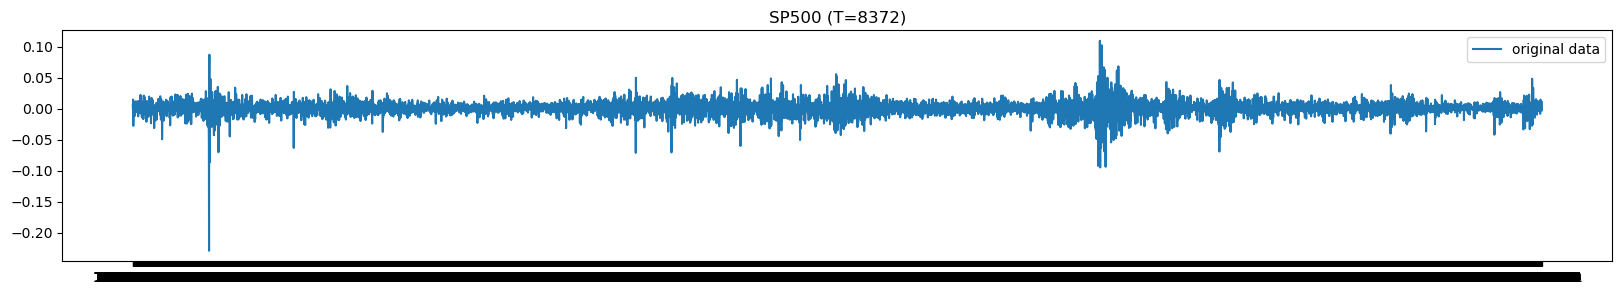

In [7]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_sp500['Date'], df_sp500['SP500'], label="original data")
# plt.plot(df_sp500['Date'], df_sp500['SP500'].diff(), label="diff")
plt.legend()
plt.title("SP500 (T=8372)")
plt.show()

# Nadara-Watson estimator 

In [8]:
# C = 2
space_kernel = "gaussian" # "silverman"
time_kernel = "uniform"
T = df_sp500.shape[0]
d = 1
bandwidth = T **(-0.4 / (d+1)) / 80
X_dict = df_sp500['SP500'].values.reshape(-1,1) #df_malleco['Value'].diff().values.reshape(-1, 1)
X_tvar_2 = df_sp500['SP500'].values #df_malleco['Value'].diff().values

GaussUnifKernel = Kernel(T=T, bandwidth=bandwidth, space_kernel=space_kernel, time_kernel=time_kernel)
GaussUnifKernel 
Y_t_T = df_sp500['SP500'].values

weights = {}
for t in range(T):
    weights[str(t)] = GaussUnifKernel.fit(X_dict, t)
    
m_hat = [np.sum(weights[str(t)] * Y_t_T) for t in range(T)]

In [9]:
dates = df_sp500['Date'].copy()
dates = pd.to_datetime(dates, format="%Y-%m-%d")
# dates

In [10]:
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

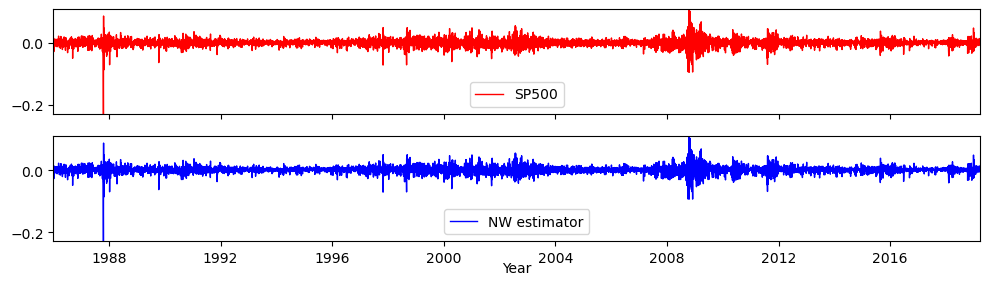

2024/06/04 11:26:29 Saved result in file SP500-NW-Gaussian-sp-Uniform-time-C-80.pdf


In [11]:
import logging

logging.basicConfig(
    format="%(asctime)s %(message)s", datefmt="%Y/%m/%d %H:%M:%S", level=logging.INFO
)

path_fig = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/figs/"

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,3) , sharex=True)
plt.subplots_adjust(wspace=0, hspace=0.02)
# plt.rcParams['axes.grid'] = True
# plt.rcParams['axes.facecolor'] = 'black'

output_filename = "SP500-NW-Gaussian-sp-Uniform-time-C-80.pdf"
# from matplotlib.colors import ListedColormap
# cm = plt.cm.RdBu
# cm_bright = ListedColormap(["#FF0000", "#0000FF"])

ax[0].plot(dates, X_tvar_2, lw=1, label="SP500", color="#FF0000")  # #, color="r") #, cmap=cm)
ax[0].set_xlim(min(dates), max(dates.values))
ax[0].set_ylim(min(min(m_hat), min(X_tvar_2)),  max(max(m_hat), max(X_tvar_2)))
ax[0].legend(loc='lower center')

ax[1].plot(dates, np.array(m_hat), lw=1, label="NW estimator" , c="#0000FF")#cm_bright[0]) #"orange")
ax[1].set_xlim(min(dates.values), max(dates))
ax[1].set_ylim(min(min(m_hat), min(X_tvar_2)),  max(max(m_hat), max(X_tvar_2)))
ax[1].legend(loc='lower center')
ax[1].set_xlabel("Year")
ax[1].xaxis.set_label_coords(0.5, -0.19)
plt.savefig(path_fig+output_filename, dpi=300)
plt.tight_layout()
plt.show()
logging.info("Saved result in file %s" % output_filename)

In [18]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

np.sqrt(mse(np.array(m_hat), X_tvar_2)), mae(np.array(m_hat), X_tvar_2)

(0.0006149674593312699, 0.0004860359462627665)

In [13]:
# C=50 (0.001172155920163532, 0.0009422481395214372)
# C=80 (0.0006149674593312699, 0.0004860359462627665)

In [14]:
np.log(1 / 70) / np.log(T)
6.149 * 10**(-4), 4.86*10-4

0.0006149

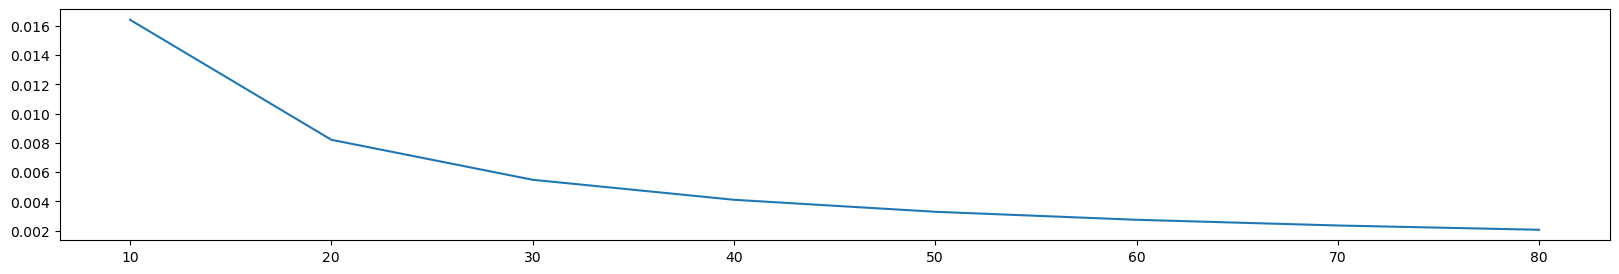

In [15]:
C = np.array([10 ,20, 30, 40 ,50, 60, 70, 80])
bandwidth = T **(-0.4 / (d+1)) / C
plt.plot(C, bandwidth, label="Bandwidth")

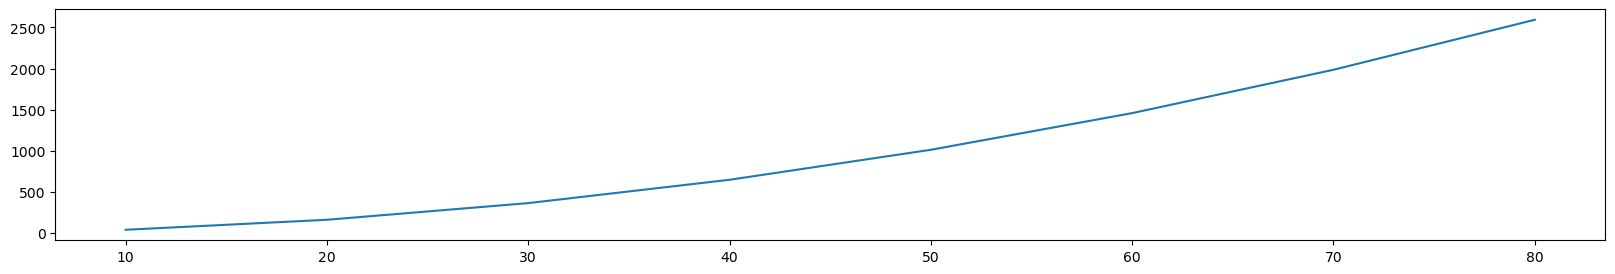

In [16]:

plt.plot(C, 1 / (**(1/2) * bandwidth**2), label="Bandwidth")

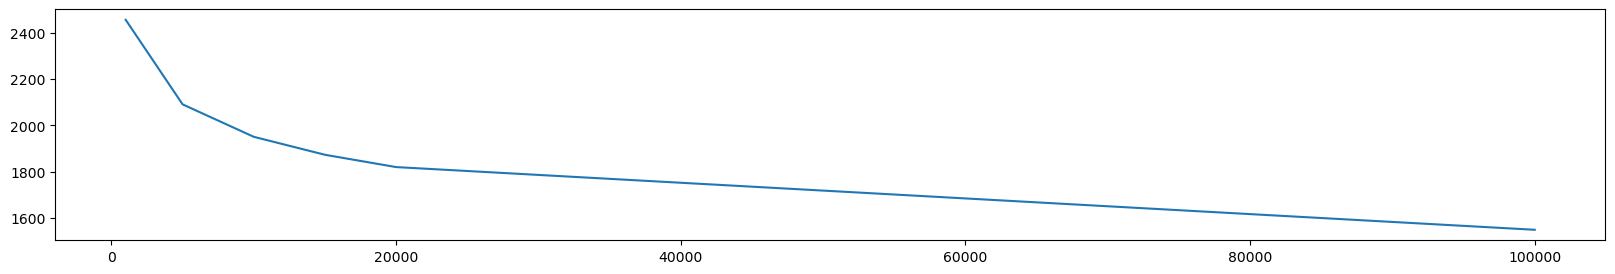

In [17]:
C = 70
T = np.array([1000, 5000, 10000, 15000, 20000, 100000])
bandwidth = T **(-0.4 / (d+1)) / C
plt.plot(T, 1 / (T**(1/2) * bandwidth**2), label="Bandwidth")